In [1]:
import tensorflow.keras.layers
import tensorflow.keras.models

In [3]:
x=tensorflow.keras.layers.Input(shape=(784),name="encoder_input")
encoder_dense_layer1=tensorflow.keras.layers.Dense(units=300,name="encoder_dense_layer1")(x)
encoder_activ_layer1=tensorflow.keras.layers.LeakyReLU(name="encoder_relu1")(encoder_dense_layer1)

encoder_dense_layer2=tensorflow.keras.layers.Dense(units=2,name="encoderdense_layer1")(encoder_activ_layer1)
encoder_output=tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)


In [5]:
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

In [6]:
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_layer1 (Dense) (None, 300)               235500    
_________________________________________________________________
encoder_relu1 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
encoderdense_layer1 (Dense)  (None, 2)                 602       
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


In [8]:
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [9]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

In [10]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               900       
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               235984    
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 784)               0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_________________________________________________________________


In [11]:
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

In [12]:
ae.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder_model (Model)        (None, 2)                 236102    
_________________________________________________________________
decoder_model (Model)        (None, 784)               236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


In [13]:
import tensorflow.keras.optimizers

In [15]:
ae.compile(loss="mse",optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

In [19]:
import tensorflow.keras.datasets
import numpy 

In [20]:
(x_train_orig,y_train),(x_test_orig,y_test)=tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train=numpy.reshape(x_train_orig,newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test=numpy.reshape(x_test_orig,newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

In [21]:
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0606 - val_loss: 0.0552
Epoch 2/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0545 - val_loss: 0.0530
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0526 - val_loss: 0.0514
Epoch 4/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0511 - val_loss: 0.0501
Epoch 5/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0501 - val_loss: 0.0492
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0493 - val_loss: 0.0486
Epoch 7/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0487 - val_loss: 0.0483
Epoch 8/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0483 - val_loss: 0.0477
Epoch 9/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0479 - val_

In [22]:
encoded_images=encoder.predict(x_train)
decoded_images=decoder.predict(encoded_images)

In [23]:
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

In [32]:
import matplotlib.pyplot as plt


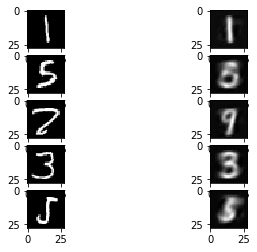

In [33]:
num_images_to_show=5
for(num_count) in range(num_images_to_show):
    plot_ind=num_count*2+1
    rand_ind=numpy.random.randint(low=0,high=x_train.shape[0])
    plt.subplot(num_images_to_show,2,plot_ind)
    plt.imshow(x_train_orig[rand_ind,:,:],cmap="gray")
    plt.subplot(num_images_to_show,2,plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind,:,:],cmap="gray")
    

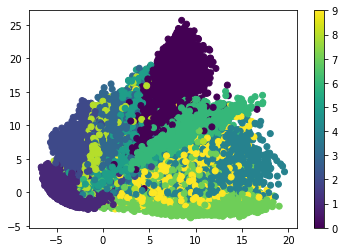

In [35]:
plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train) 
plt.colorbar()